In [232]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as scipy_stats
from matplotlib import pyplot as plt
import seaborn as sns


In [233]:
# Importing CSV and representing it as a dataframe
CSV_PATH = "./data/college_csit.csv"
df = pd.read_csv(CSV_PATH)

In [234]:
# Dataframe is shown below, with necessary styling, for better readability
df.style.set_table_styles([{'selector': 'caption', 'props': [('text-align', 'left')]}])

,Institution Name,Location,District,Seats,Type
0,Patan Multiple Campus,Patandhoka,Lalitpur,144,Constituent
1,Amrit Campus,Lainchaur,Kathmandu,144,Constituent
2,Bhaktapur Multiple Campus,Bhaktapur,Bhaktapur,72,Constituent
3,Padmakanya Multiple Campus,Bagbazar,Kathmandu,72,Constituent
4,St. Xavier's College,Maitighar,Kathmandu,48,Affiliated
5,Kathford International College of Engineering and Management,Balkumari,Lalitpur,48,Affiliated
6,New Summit College,Tinkune,Kathmandu,48,Affiliated
7,Prime College,Khushibu,Kathmandu,48,Affiliated
8,St. Lawrence College,Chabahil,Kathmandu,36,Affiliated
9,College of Applied Business and Technology,Chabahil,Kathmandu,36,Affiliated


In [235]:
# Calculations I-A: Division of Institutes (Constituent)

# Grouping of data is performed using groupby(ATTRIBUTE_NAME)
# get_group(VALUE) is followed for necessary grouping of values
df_grouped_by_type = df.groupby("Type")
constituent_institutes = df_grouped_by_type.get_group("Constituent")

# Index reset is required: Dataframe retain the old index after grouping
constituent_institutes = constituent_institutes.reset_index(drop=True)

# Dataframe displayed with necessary styling
constituent_institutes.style.set_table_styles([{'selector': 'caption', 'props': [('text-align', 'left')]}])


,Institution Name,Location,District,Seats,Type
0,Patan Multiple Campus,Patandhoka,Lalitpur,144,Constituent
1,Amrit Campus,Lainchaur,Kathmandu,144,Constituent
2,Bhaktapur Multiple Campus,Bhaktapur,Bhaktapur,72,Constituent
3,Padmakanya Multiple Campus,Bagbazar,Kathmandu,72,Constituent
4,Shree Siddhanath Science Campus,Mahendranagar,Kanchanpur,72,Constituent
5,Ramswarup Ramsagar Multiple Campus,Janakpur,Dhanusha,36,Constituent
6,Mechi Multiple Campus,Bhadrapur,Jhapa,36,Constituent
7,Central Campus of Technology,Dharan,Sunsari,36,Constituent
8,Birendra Memorial College,Dharan,Sunsari,48,Constituent
9,Mahendra Morang Aadarsha Multiple Campus,Biratnagar,Morang,36,Constituent


In [236]:
# Calculations I-B: Division of Institutes (Affiliated)
affiliated_institutes = df_grouped_by_type.get_group("Affiliated")

# Similarly, index reset is required
affiliated_institutes = affiliated_institutes.reset_index(drop=True)

# Dataframe displayed with necessary styling
affiliated_institutes.style.set_table_styles([{'selector': 'caption', 'props': [('text-align', 'left')]}])


,Institution Name,Location,District,Seats,Type
0,St. Xavier's College,Maitighar,Kathmandu,48,Affiliated
1,Kathford International College of Engineering and Management,Balkumari,Lalitpur,48,Affiliated
2,New Summit College,Tinkune,Kathmandu,48,Affiliated
3,Prime College,Khushibu,Kathmandu,48,Affiliated
4,St. Lawrence College,Chabahil,Kathmandu,36,Affiliated
5,College of Applied Business and Technology,Chabahil,Kathmandu,36,Affiliated
6,Kathmandu Bernhardt College,Baphal,Kathmandu,48,Affiliated
7,Deerwalk Institure of Technology,Siphal,Kathmandu,48,Affiliated
8,Vedas College,Jawalakhel,Lalitpur,48,Affiliated
9,Texas International College,Chabahil,Kathmandu,48,Affiliated


In [237]:
# Calculation I-C: Divided counts for institutes are returned
total_institutes = len(df)
total_institutes_constituent = len(constituent_institutes)
total_institutes_affiliated = len(affiliated_institutes)

print("Number of Institutes (BSc. CSIT - TU)\n")
print("Total Institutes: ", total_institutes)
print("No. of Constituent Institutes:", total_institutes_constituent)
print("No. of Affiliated Institutes:", total_institutes_affiliated)

# Verification: Is total_institutes == SUM(constituent, affiliated)?
assert_total_institutes = total_institutes == (total_institutes_affiliated + total_institutes_constituent)
print("Assertion for total no. of institutes:", assert_total_institutes)

Number of Institutes (BSc. CSIT - TU)

Total Institutes:  60
No. of Constituent Institutes: 15
No. of Affiliated Institutes: 45
Assertion for total no. of institutes: True


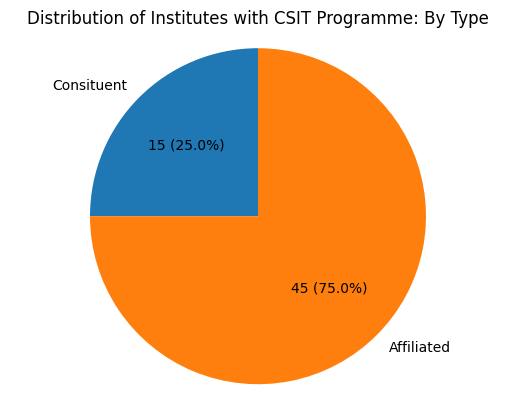

In [238]:
# Visualization I: Pie Chart for Number of Institutions
label_types_institutes = ["Consituent", "Affiliated"]
size_types_institutes = [total_institutes_constituent, total_institutes_affiliated]

# TODO: Create a function for displaying pie-chart
# Pie Chart is created using pie() method from matplotlib.pyplot
# autopct argument specifies the format of the label
plt.pie(size_types_institutes,
        labels=label_types_institutes,
        startangle=90,
        autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(size_types_institutes) / 100, p)
        )
plt.axis("equal")
plt.title("Distribution of Institutes with CSIT Programme: By Type")
plt.show()

In [239]:
# Calculations II-A: Calculate the number of seats using sum() on an attribute
total_seats =  df["Seats"].sum()

# Division of Seats between types of institutes
seats_constituent = constituent_institutes["Seats"].sum()
seats_affiliated = affiliated_institutes["Seats"].sum()

# Display the Number of Seats
print("Number of Seats (BSc. CSIT - TU)\n")
print("Total Seats:", total_seats)
print("Seats (Constituent):", seats_constituent)
print("Seats (Affiliated):", seats_affiliated)

# Assertion: Number of Seats
assert_total_seats = total_seats == (seats_affiliated + seats_constituent)
print("Assertion for no. of seats:", assert_total_seats)


Number of Seats (BSc. CSIT - TU)

Total Seats: 2892
Seats (Constituent): 984
Seats (Affiliated): 1908
Assertion for no. of seats: True


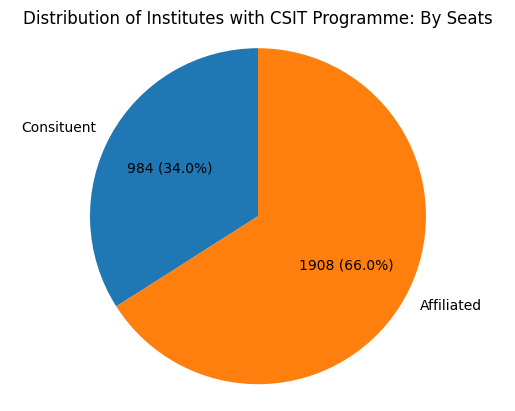

In [240]:
# Visualization II: Pie Chart for number of seats

label_types_institutes = ["Consituent", "Affiliated"]
size_types_institutes = [seats_constituent, seats_affiliated]

# TODO: Create a function for displaying pie-chart
# Pie Chart is created using pie() method from matplotlib.pyplot
# autopct argument specifies the format of the label
plt.pie(size_types_institutes,
        labels=label_types_institutes,
        startangle=90,
        autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(size_types_institutes) / 100, p)
        )
plt.axis("equal")
plt.title("Distribution of Institutes with CSIT Programme: By Seats")
plt.show()

In [241]:
# Calculations III-A: Five point summary values for the data
seats_per_institute = df["Seats"].to_numpy()

seats_mean = np.mean(seats_per_institute)
seats_median = np.median(seats_per_institute)
seats_min = np.min(seats_per_institute)
seats_max = np.max(seats_per_institute)
seats_q1 = np.percentile(seats_per_institute, 25)
seats_q3 = np.percentile(seats_per_institute, 75)

print("Five Point Summary of Number of Seats")
print("MIN:", seats_min)
print("MAX:", seats_max)
print("Q1:", seats_q1)
print("Q2:", seats_median)
print("Q3:", seats_q3)

Five Point Summary of Number of Seats
MIN: 36
MAX: 144
Q1: 36.0
Q2: 48.0
Q3: 48.0


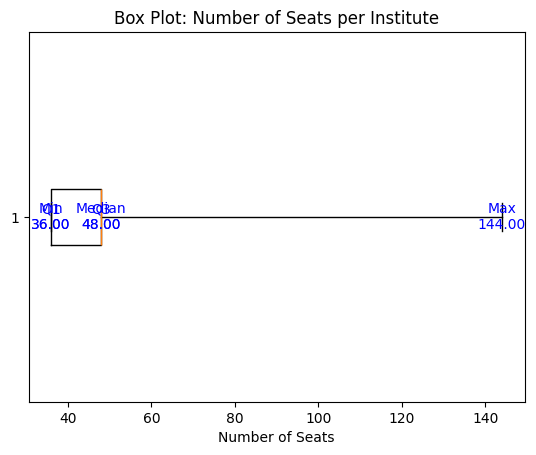

In [242]:
# Visualization III-A: Box Plot for Number of Seats per institute
plt.boxplot(seats_per_institute, vert=False, showfliers=False, whis=[0, 100])
plt.xlabel("Number of Seats")
plt.title("Box Plot: Number of Seats per Institute")

# Labeling the plot
for x, label in zip([seats_min, seats_q1, seats_median, seats_q3, seats_max], ["Min", "Q1", "Median", "Q3", "Max"]):
    plt.text(x, 1, f'{label}\n{x:.2f}', color='blue', va='center', ha='center')

plt.show()

In [243]:
# Calculations III-B: Skewness and Kurtosis
seats_skewness = scipy_stats.skew(seats_per_institute)
seats_kurtosis = scipy_stats.kurtosis(seats_per_institute)
print("Shape of the Distribution (Seats per Institute):")
print("Skewness:", round(seats_skewness,4))
print("Kurtosis:", round(seats_kurtosis, 4))

Shape of the Distribution (Seats per Institute):
Skewness: 3.2073
Kurtosis: 11.4889


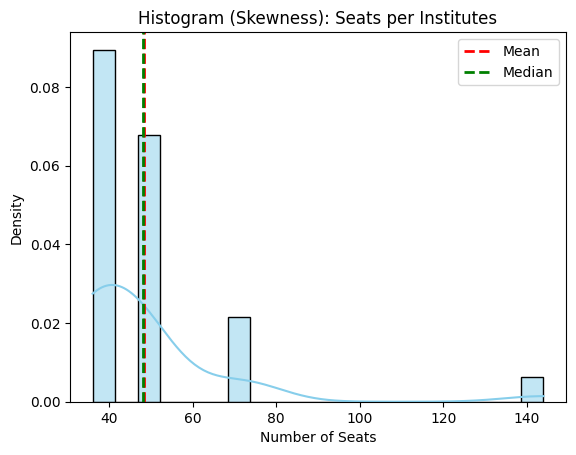

In [244]:
# Visualization III-B: Historgram showing the Skewness of Seats per Institute
sns.histplot(seats_per_institute,
             bins=20,
             kde=True,
             color='skyblue',
             stat='density')

plt.axvline(seats_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(seats_median, color='green', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel("Number of Seats")
plt.ylabel("Density")
plt.title("Histogram (Skewness): Seats per Institutes")
plt.legend()
plt.show()

In [245]:
# Calculations IV-A: Count of districts having institution with CSIT
# unique() method returns unique data from a column

TOTAL_DISTRICTS = 77
districts_csit = df["District"].unique()
districts_csit_count = len(districts_csit)

print("Districts having institutes with CSIT:", districts_csit_count, "out of", TOTAL_DISTRICT, "districts")

print("\nList of Districts:")
for district in districts_csit:
    print(f"- {district}")



Districts having institutes with CSIT: 17 out of 77 districts

List of Districts:
- Lalitpur
- Kathmandu
- Bhaktapur
- Kavrepalanchok
- Kanchanpur
- Dhanusha
- Jhapa
- Sunsari
- Morang
- Parsa
- Makwanpur
- Chitwan
- Nawalparasi
- Kaski
- Rupandehi
- Banke
- Dang


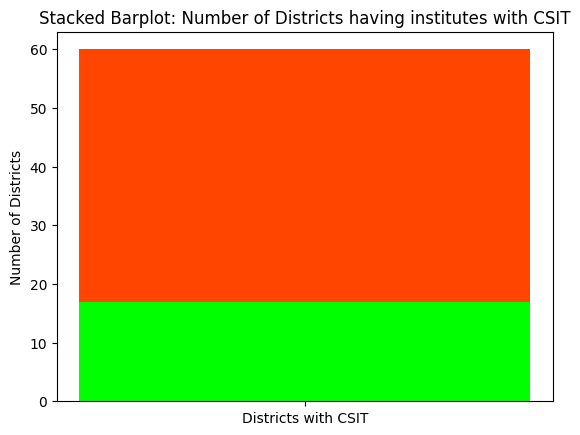

In [246]:
# Visualization IV-A: Bar-Chart of Districts having institutes with CSIT
fig, ax = plt.subplots()

data = [TOTAL_DISTRICTS - districts_csit_count, districts_csit_count]
colors = ["orangered", "lime"]

ax.bar("Districts with CSIT", data, color=colors)
ax.set_ylabel("Number of Districts")
ax.set_title("Stacked Barplot: Number of Districts having institutes with CSIT")

plt.show()


